In [1]:
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()
detector.reset()

filepath = "./user_tag_query.10W.TRAIN"
for each in open(filepath, 'rb'):
    detector.feed(each)
    if detector.done:
        break
detector.close()
fileencoding = detector.result['encoding']
confidence = detector.result['confidence']

if fileencoding == "GB2312" or "GBK":
    fileencoding = "GB18030"
print(fileencoding)
print(confidence)

GB18030
0.99


In [4]:
# 首先读取文件

import ray
import datetime
start=datetime.datetime.now()

data = open('./user_tag_query.10W.TRAIN', 'r', encoding=fileencoding)
all_loginfo = []

for line in data:
    # 对第一行所有内容进行制表符拆分
    line_pre = line.split('\t')
    valid_info = line_pre[4:]
    
    all_loginfo.extend(valid_info)
    # 测试一下日志中总共有多少条记录
print(len(all_loginfo))

file_name = 'all_logs.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in all_loginfo:
        file.write(words + '\n')
        
#中间写代码块
end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

2023-10-24 21:37:12,452	INFO worker.py:1642 -- Started a local Ray instance.


14273095
Running time: 0:00:47.709540 Seconds


In [13]:
# 过滤掉无效内容
import re
data = open('./all_logs.txt', 'r', encoding='utf-8')
pattern = r'https?://\S+|www\.\S+|[\w.-]+@[\w.-]+|'
file_name = 're_filter.txt'
fil_loginfo = []
count = 0
for word in data:
    filtered_line = re.sub(pattern, '', word)
     # 打印经过过滤的行（如果不为空）
    if filtered_line.strip():  # 检查经过过滤后的行是否不为空
        fil_loginfo.append(filtered_line)
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in fil_loginfo:
        file.write(words)

柔和双沟



In [52]:
import jieba

sep_list = []
data = open('./re_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    seg_list = jieba.cut(word, cut_all=False)
    Seg_list = list(seg_list)
    sep_list.extend(Seg_list)

file_name = 'jieba_words.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in sep_list:
        file.write(words + '\n')

In [23]:
stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

word_list = []
data = open('./jieba_words.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

def remove_stop_words(word_list, stop_words):
    word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    return word_cleaned

word_list = remove_stop_words(word_list, stop_words_list)

print(len(word_list))

file_name = 'stopwords_filter.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in word_list:
        file.write(words + '\n')

44071225


In [3]:
# 下面统计所有关键词的出现次数
from collections import Counter

word_list = []
data = open('./stopwords_filter.txt', encoding='utf-8')
for word in data:
    word = word.strip()
    word_list.append(word)

from collections import Counter

result = []
count_result = Counter(word_list)
for key,val in count_result.most_common(2000):
    key_val = "关键字：" + key + "||" + "出现次数：" + str(val)
    print(key_val)
    result.append(key_val)
    
file_name = 'seeds_keyvalue.txt'
    # 打开文件以写入模式
with open(file_name, 'w', encoding='utf-8') as file:
    # 逐行写入列表中的数据
    for words in result:
        file.write(words + '\n')

关键字：图片||出现次数：291066
关键字：手机||出现次数：191395
关键字：意思||出现次数：190842
关键字：小说||出现次数：159798
关键字：视频||出现次数：157483
关键字：2016||出现次数：144186
关键字：下载||出现次数：134916
关键字：大全||出现次数：131459
关键字：吃||出现次数：128020
关键字：钱||出现次数：103222
关键字：qq||出现次数：98473
关键字：电影||出现次数：96576
关键字：中国||出现次数：94104
关键字：说||出现次数：86231
关键字：世界||出现次数：85065
关键字：做||出现次数：76293
关键字：年||出现次数：76049
关键字：重生||出现次数：72730
关键字：百度||出现次数：68067
关键字：会||出现次数：67662
关键字：官网||出现次数：66639
关键字：txt||出现次数：65475
关键字：英语||出现次数：64913
关键字：月||出现次数：63798
关键字：电视剧||出现次数：63334
关键字：游戏||出现次数：61145
关键字：中||出现次数：61050
关键字：查询||出现次数：60950
关键字：网||出现次数：60271
关键字：做法||出现次数：60019
关键字：一个||出现次数：59776
关键字：倾城||出现次数：57944
关键字：荣耀||出现次数：57394
关键字：版||出现次数：57072
关键字：里||出现次数：54000
关键字：苹果||出现次数：53629
关键字：号||出现次数：53224
关键字：怀孕||出现次数：52838
关键字：时间||出现次数：52717
关键字：微微一笑||出现次数：52503
关键字：大学||出现次数：52146
关键字：字||出现次数：52074
关键字：王者||出现次数：52006
关键字：爱||出现次数：51940
关键字：软件||出现次数：51686
关键字：电脑||出现次数：50156
关键字：阅读||出现次数：49857
关键字：学院||出现次数：49763
关键字：漫画||出现次数：49250
关键字：微信||出现次数：49249
关键字：全集||出现次数：48666
关键字：价格||出现次数：48635
关键字：成语||出现

In [104]:
# 工具方法：测试词义相似度
# 认为两个词义高度近似的词在竞度分析中是没有意义的
# 并解决一个词包含另一个词引起的搜索量消失问题
import spacy
def word_similarity(word1, word2):
#     nlp = spacy.load('zh_core_web_sm')
#     doc1 = nlp(word1)
#     doc2 = nlp(word2)
#     similarity = doc1.similarity(doc2)
    similarity = 0 
    if word1 in word2 or word2 in word1:
        similarity = 0.9
    if similarity >= 0.9:
        return True  #true表示高度相似
    else:
        return False #false表示相似度较低

# 工具方法：判断一个目录是否存在，不存在则创建
def path_check(path):
    if not os.path.exists(path):
        os.makedirs(path)

print(word_similarity("图片", "背景图片"))

True


In [105]:
# 下面是中介关键词的获得


# step1 进行有关搜索信息的提取
def seedwords_file(seedword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data:
        if seedword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()

seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/search_info/seedword_'+seedword+'.txt'
    seedwords_file(seedword,filename)

In [106]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含种子关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, filename):
    sep_list = []
    data = open('./seedwords_agencywords/search_info/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    jieba_sep_searchInfo(seedword,filename)

In [107]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, stop_words):
    word_list = []
    filename1 = './seedwords_agencywords/jieba_search_info/seedword_'+seedword+'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './seedwords_agencywords/stop_words_filter/seedword_'+seedword+'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
#所用的种子关键词列表
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    removeseed_stop_words(seedword, stop_words_list)

In [108]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 下面统计对于每个种子关键字而言，关联搜索信息中的中介关键词的出现次数
from collections import Counter

def get_s_sa(seedword, agencyword):
    s_num = 0
    sa_num = 0
    origin_data = open('./seedwords_agencywords/search_info/seedword_'+seedword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            s_num += 1
        if agencyword in sentence:
            sa_num += 1
         
    origin_data.close()
    return s_num, sa_num

def seed_agent(filename, seedword):
    word_list = []
    result = []
    data = open('./seedwords_agencywords/stop_words_filter/seedword_'+ seedword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(100):
        print(word_similarity(seedword, key))
        if word_similarity(seedword, key):
            continue
        s_num, sa_num = get_s_sa(seedword, key)
        if key == seedword:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "关键字：" + key + "||" + "出现次数：" + str(val) + "||" + "中介关键词权重：" + str(round(sa_num/s_num,8))
        result.append(key_val)
        
        # 对结果按中介关键词权重降序排列
    result.sort(key=lambda x: float(x.split("中介关键词权重：")[1]), reverse=True)
        
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    filename = './seedwords_agencywords/agency_words/seedword_'+seedword+'.txt'
    seed_agent(filename,seedword)

True
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [109]:
#实验部分，用处不大，主要是进行jieba分词的词量与搜索量的探究

file_path = './seedwords_agencywords/search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1
        if line.count("大全") >= 2:
            line_count += 1

print("文件有单行重复出现关键词的有", line_count, "行。","出现关键词的有",line_count2,'行')


file_path = './seedwords_agencywords/jieba_search_info/seedword_图片' + '.txt'
line_count = 0
line_count2 = 0
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if "大全" in line:
            line_count2 += 1

print("jieba分词后的关键词数量有",line_count2,'行')


文件有单行重复出现关键词的有 98 行。 出现关键词的有 32623 行
jieba分词后的关键词数量有 32263 行


In [110]:
import os
# 下面是备选竞争性关键词的获取

# step1 进行有关搜索信息的提取，将各个中介关键词的相关搜索都提取出来
def agencyword_record(agencyword, filename):
    origin_data = open('./re_filter.txt', encoding = 'utf-8')
    result_data = open(filename,'w',encoding='utf-8')
    for sentence in origin_data :
        if agencyword in sentence:
            result_data.write(sentence)
    origin_data.close()
    result_data.close()
    
# 从中介关键词存放的文件中读取出相关信息，这里只提取权重在前10的中介关键词
def get_agencywords(seedword):
    agencywords_list=[]
    agencywords_data = open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in agencywords_data:
        data = line.split("||")  
        word = data[0][4:]
        if word == seedword:
            continue      #该关键词是种子关键词，则丢弃
        elif word_similarity(seedword,word):
            continue      #将相似度很高的词进行剔除
        agencywords_list.append(word)
        
        line_count += 1
        if line_count >= 10:
            break  # 达到10行后退出循环
    print("种子关键词",seedword,"的中介关键词列表为",agencywords_list)
    return agencywords_list


seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
# 对每个种子关键词的中介关键词进行遍历
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/search_info/seedword_'+seedword)
        filename = './agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        agencyword_record(agencyword,filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [111]:
import jieba

# step2 对搜索信息进行jieba分词

# 对包含中介关键词的搜索信息进行jieba分词
def jieba_sep_searchInfo(seedword, agencyword, filename):
    sep_list = []
    data = open('./agencywords_compkey/search_info/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        seg_list = jieba.cut(word, cut_all=False)
        Seg_list = list(seg_list)
        sep_list.extend(Seg_list)
            
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in sep_list:
            file.write(words + '\n')
            
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/jieba_search_info/seedword_'+seedword)
        filename = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        jieba_sep_searchInfo(seedword, agencyword, filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [112]:
# step3 对jieba分词结果停语词清洗

stop_words = "stop_words.txt"
stop_words_dict = open(stop_words, 'r', encoding='utf-8')
stop_words_contents = stop_words_dict.read()
stop_words_list = stop_words_contents.splitlines()
stop_words_dict.close()

def removeseed_stop_words(seedword, agencyword, stop_words):
    word_list = []
    filename1 = './agencywords_compkey/jieba_search_info/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    data = open(filename1, encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
        word_cleaned = []
    for word in word_list:
        if word not in stop_words:
            word_cleaned.append(word)
    filename2 = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword +'.txt'
    with open(filename2, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in word_cleaned:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/stop_words_filter/seedword_'+seedword)
        filename = './agencywords_compkey/stop_words_filter/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        removeseed_stop_words(seedword, agencyword, stop_words_list)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [122]:
# step4 停语词清洗后的结果进行出现出现次数统计

# 将所有的关键词进行保存
from collections import Counter

def find_compkey(seedword, agencyword, filename):
    word_list = []
    result = []
    data = open('./agencywords_compkey/stop_words_filter/seedword_'+ seedword +'/agencyword_ '+agencyword + '.txt', encoding='utf-8')
    for word in data:
        word = word.strip()
        word_list.append(word)
    count_result = Counter(word_list)
    for key,val in count_result.most_common(150):
        if key == agencyword:
            key_val = "中介关键字：" + key + "||" + "出现次数：" + str(val) 
        elif key == seedword:
            key_val = "种子关键字：" + key + "||" + "出现次数：" + str(val) 
        else:
            key_val = "竞争关键字：" + key + "||" + "出现次数：" + str(val) 
        result.append(key_val)
        # 打开文件以写入模式
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
            
seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        path_check('./agencywords_compkey/compkey_words/seedword_'+seedword)
        filename = './agencywords_compkey/compkey_words/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        find_compkey(seedword, agencyword, filename)

种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
种子关键词 重生 的中介关键词列表为 ['女', '小说', '文', '宠', 'txt', '妻', '男', '末世', '女主', '空间']
种子关键词 百度 的中介关键词列表为 ['云', '资源', '贴', '盘', '下载', '百科', '版', '分享', '云盘', '地图']
种子关键词 官网 的中介关键词列表为 ['中', '学院', '大学', '网官', '手机', '手游', '中国', '苹果', '职业', '首页']
种子关键词 英语 的

In [135]:
# 从文件中提取出竞争关键词   
def get_compkeys1(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 5:
            break  # 达到5行后退出循环
    return compkeys_list


seedwords_list = ['图片', '手机', '意思', '小说', '视频', '下载', '大全', '电影', '中国', '世界', '重生', '百度', '官网', '英语', '电视剧']



for i, seedword in enumerate(seedwords_list):
    # 创建一个空的二维列表
    all_compkey = []
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys1(seedword, agencyword)
        all_compkey.append(compkeys_list)

    # 创建一个字典来记录每个词在多少个 compkey_set 中存在
    word_count = {}

    for compkey_set in all_compkey:
        for word in compkey_set:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

    # 找到值最大的关键词
    most_common_word = max(word_count, key=word_count.get)

    print(f"值最大的关键词: {most_common_word}, 出现次数: {word_count[most_common_word]}")


种子关键词 图片 的中介关键词列表为 ['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
值最大的关键词: 大全, 出现次数: 4
种子关键词 手机 的中介关键词列表为 ['版', '网', '号', '下载', 'qq', '苹果', '软件', '卡', '游戏', '开']
值最大的关键词: 下载, 出现次数: 4
种子关键词 意思 的中介关键词列表为 ['a', 't', 's', 'c', 'm', 'b', '中', '梦见', '三', '老']
值最大的关键词: ., 出现次数: 6
种子关键词 小说 的中介关键词列表为 ['女', '网', '穿', '类', '男', '穿越', '女主', '阅读', '好看', '主角']
值最大的关键词: 图片, 出现次数: 3
种子关键词 视频 的中介关键词列表为 ['在线', '舞', '教学', '大全', '观看', '手机', '发', '戏', '教程', '腾讯']
值最大的关键词: 电影, 出现次数: 3
种子关键词 下载 的中介关键词列表为 ['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
值最大的关键词: 手机, 出现次数: 4
种子关键词 大全 的中介关键词列表为 ['图片', '做法', '字', '名字', '戏', '视频', '游戏', '电影', '歌曲', '电视剧']
值最大的关键词: 下载, 出现次数: 3
种子关键词 电影 的中介关键词列表为 ['版', '网', '韩国', '在线', '完整版', '爱', '观看', '大全', '微', '全集']
值最大的关键词: 视频, 出现次数: 5
种子关键词 中国 的中介关键词列表为 ['网', '新', '银行', '女排', '大学', '歌声', '2016', '代', '年', '奥运']
值最大的关键词: 2016, 出现次数: 5
种子关键词 世界 的中介关键词列表为 ['魔兽', '版', '两个', 'w', '异', '手机', '.', '从零开始', '生活', '中']
值最大的关键词: 手机, 出现次数: 3
种子关键词 重生 的中介关键词列表为 ['女', '小说',

In [46]:
import os
# 下面是comp竞度的计算和相关操作

# 获取文件中a、sa、ka的搜索量
def get_a_sa_ka(seedword, agencyword, compkey):
    a_num = 0
    sa_num = 0
    ka_num = 0
    origin_data = open('./agencywords_compkey/search_info/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt', encoding = 'utf-8')
    for sentence in origin_data :
        if seedword in sentence:
            if compkey in sentence:
                continue
            else:
                sa_num += 1
                a_num += 1
        else:
            if compkey in sentence:
                ka_num += 1
                a_num += 1
            else:
                a_num += 1
             
    origin_data.close()
    print("a:",a_num,"sa:",sa_num,"ka:",ka_num)
    return a_num, sa_num, ka_num
    
# 计算comp竞度
def cal_comp(a, sa, ka):
    return round(ka/(a - sa),8)

# 从文件中提取出竞争关键词   
def get_compkeys(seedword, agencyword):
    compkeys_list=[]
    compkeys_data = open('./agencywords_compkey/compkey_words/seedword_'+seedword +'/agencyword_ '+agencyword +'.txt', encoding = 'utf-8')
    line_count = 0 
    for line in compkeys_data:
        data = line.split("||")
        word = data[0][6:]
        if word == agencyword:
            continue
        if word == seedword:
            continue 
        if word_similarity(word,seedword):
            continue
        if word_similarity(word,agencyword):
            continue
        compkeys_list.append(word)
        
        line_count += 1
        if line_count >= 5:
            break  # 达到5行后退出循环
    print(compkeys_list)
    return compkeys_list

#保存comp竞度
def save_comp(result, filename):
    with open(filename, 'w', encoding='utf-8') as file:
        # 逐行写入列表中的数据
        for words in result:
            file.write(words + '\n')
                     

seedwords_list=['图片','手机','意思','小说','视频','下载','大全','电影','中国','世界','重生','百度','官网','英语','电视剧']
for seedword in seedwords_list:
    agencywords_list = get_agencywords(seedword)
    for agencyword in agencywords_list:
        compkeys_list = get_compkeys(seedword, agencyword)
        result = []   #每一个中介关键词存一遍结果
        for compkey in compkeys_list:
            a_num, sa_num, ka_num = get_a_sa_ka(seedword, agencyword, compkey)
            comp = cal_comp(a_num, sa_num, ka_num)
            info = "种子关键词：" + seedword + "||" + "中介关键词：" + agencyword  + "||"  + "竞争关键词:" + compkey + "||" + "comp:" + str(comp)
            result.append(info)
        result.sort(key=lambda x: float(x.split("comp:")[1]), reverse=True)
        path_check('./result/seedword_'+seedword)
        filename = './result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'
        save_comp(result, filename)

['大全', '女', '画', '中', '字', '型', '男', '花', '发型', '带']
['做法', '名字', '视频', '电影', '游戏']
a: 136132 sa: 32466 ka: 12850
a: 136166 sa: 32500 ka: 5802
a: 136264 sa: 32598 ka: 4861
a: 136260 sa: 32594 ka: 3815
a: 136253 sa: 32587 ka: 4421
['小说', '旋风', '重生', '头像', '漫画']
a: 378627 sa: 12721 ka: 15116
a: 378489 sa: 12583 ka: 10355
a: 378639 sa: 12733 ka: 9642
a: 378263 sa: 12357 ka: 8218
a: 378418 sa: 12512 ka: 7941
['邪恶', '少女', '大全', '全集', '月光']
a: 114451 sa: 9306 ka: 8823
a: 114497 sa: 9352 ka: 6655
a: 111709 sa: 6564 ka: 3693
a: 114535 sa: 9390 ka: 4973
a: 114592 sa: 9447 ka: 2360
['2016', '新', '年', '作文', '意思']
a: 465473 sa: 8801 ka: 13966
a: 465606 sa: 8934 ka: 13744
a: 465608 sa: 8936 ka: 12540
a: 465719 sa: 9047 ka: 5483
a: 465717 sa: 9045 ka: 4879
['作文', '成语', '大全', '开头', '600']
a: 173510 sa: 8205 ka: 10635
a: 173504 sa: 8199 ka: 10511
a: 172553 sa: 7248 ka: 9493
a: 173524 sa: 8219 ka: 6634
a: 173525 sa: 8220 ka: 5137
['适合', '短发', '男生', '2016', '男']
a: 63053 sa: 7853 ka: 3548
a: 61828 sa: 6

a: 211428 sa: 3764 ka: 8146
['吻', '大全', '下载', '手机', '玩']
a: 109458 sa: 1635 ka: 9056
a: 111201 sa: 3378 ka: 5018
a: 111798 sa: 3975 ka: 5114
a: 111774 sa: 3951 ka: 8607
a: 111765 sa: 3942 ka: 9423
['英语', '大学', '答案', '图解', '综合']
a: 17735 sa: 3701 ka: 1299
a: 17756 sa: 3722 ka: 1010
a: 17761 sa: 3727 ka: 927
a: 17733 sa: 3699 ka: 769
a: 17764 sa: 3730 ka: 661
['会员', '游戏', 'qq', '下载', '客服']
a: 12989 sa: 2560 ka: 552
a: 13719 sa: 3290 ka: 1086
a: 13686 sa: 3257 ka: 757
a: 13391 sa: 2962 ka: 376
a: 13711 sa: 3282 ka: 669
['txt', '版', '手机', '全集', '网', '游戏', '软件', '免费', '小说', '云']
['全集', '重生', '小说', '微盘', '免费']
a: 59569 sa: 28149 ka: 381
a: 64683 sa: 33263 ka: 2091
a: 64609 sa: 33189 ka: 1071
a: 65603 sa: 34183 ka: 1190
a: 64770 sa: 33350 ka: 117
['手机', '电影', '2016', '世界', 'qq']
a: 158995 sa: 9212 ka: 20962
a: 164299 sa: 14516 ka: 6622
a: 163398 sa: 13615 ka: 4383
a: 163901 sa: 14118 ka: 4050
a: 163532 sa: 13749 ka: 3661
['版', 'qq', '苹果', '软件', '华为']
a: 207558 sa: 6913 ka: 20962
a: 212156 sa:

['从零开始', '生活', '小说', '事件', 'txt']
a: 36920 sa: 704 ka: 50
a: 37113 sa: 897 ka: 164
a: 39359 sa: 3143 ka: 1625
a: 39587 sa: 3371 ka: 1745
a: 39641 sa: 3425 ka: 921
['版', '下载', 'qq', '苹果', '软件']
a: 210431 sa: 661 ka: 23835
a: 212718 sa: 2948 ka: 12073
a: 212926 sa: 3156 ka: 11680
a: 212913 sa: 3143 ka: 10180
a: 212920 sa: 3150 ka: 9695
['/', 'com', '手机', '下载', 't']
a: 60007 sa: 2936 ka: 2059
a: 60005 sa: 2934 ka: 2932
a: 59784 sa: 2713 ka: 2005
a: 59600 sa: 2529 ka: 1722
a: 59983 sa: 2912 ka: 6812
['异', '生活', 're', '小说', '集']
a: 498 sa: 2 ka: 50
a: 734 sa: 238 ka: 44
a: 2841 sa: 2345 ka: 16
a: 2970 sa: 2474 ka: 9
a: 3091 sa: 2595 ka: 20
['从零开始', '异', '中', '作文', '重生']
a: 22840 sa: 209 ka: 44
a: 22797 sa: 166 ka: 164
a: 25330 sa: 2699 ka: 1871
a: 25337 sa: 2706 ka: 887
a: 25337 sa: 2706 ka: 623
['2016', '图片', '新', '年', '作文']
a: 465665 sa: 2531 ka: 14158
a: 465715 sa: 2581 ka: 9043
a: 465641 sa: 2507 ka: 13779
a: 465628 sa: 2494 ka: 12560
a: 465708 sa: 2574 ka: 5472
['女', '小说', '文', '宠', 't

a: 53189 sa: 8784 ka: 2639
a: 53036 sa: 8631 ka: 860
['电影', '视频', '2016', '倾城', '微微一笑']
a: 81371 sa: 7562 ka: 3361
a: 81502 sa: 7693 ka: 1902
a: 81458 sa: 7649 ka: 2036
a: 81276 sa: 7467 ka: 1608
a: 81275 sa: 7466 ka: 1455
['下载', 'txt', '第几', '漫画', '电影']
a: 123169 sa: 6343 ka: 8343
a: 123236 sa: 6410 ka: 7323
a: 123174 sa: 6348 ka: 5566
a: 123236 sa: 6410 ka: 4112
a: 123230 sa: 6404 ka: 3849
['下载', 'txt', '漫画', '电影', '观看']
a: 50090 sa: 5389 ka: 7600
a: 50143 sa: 5442 ka: 6878
a: 50143 sa: 5442 ka: 3862
a: 50138 sa: 5437 ka: 3734
a: 49828 sa: 5127 ka: 1657
['电影', '乔任', '梁演', '杨洋', '赵丽颖']
a: 4916 sa: 3326 ka: 693
a: 4811 sa: 3221 ka: 50
a: 4793 sa: 3203 ka: 42
a: 4879 sa: 3289 ka: 48
a: 4911 sa: 3321 ka: 26
['图片', '做法', '名字', '视频', '电影']
a: 136278 sa: 2978 ka: 32612
a: 136289 sa: 2989 ka: 13007
a: 136288 sa: 2988 ka: 5924
a: 136247 sa: 2947 ka: 4844
a: 136275 sa: 2975 ka: 3830
['公寓', '图片', '说', '小说', '公主']
a: 187694 sa: 2067 ka: 4269
a: 187711 sa: 2084 ka: 4594
a: 187675 sa: 2048 ka: 885

In [54]:
from gensim.models import FastText
import datetime
start=datetime.datetime.now()

# 加载预训练的 FastText 模型（.bin.gz 格式）
model_path = "./cc.zh.300.bin.gz"
model = FastText.load_fasttext_format(model_path)

# 定义两个词语
word1 = "中国"
word2 = "中国式"

# 计算两个词语的相似度
similarity = model.wv.similarity(word1, word2)

# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低

print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))


C:\Users\wang\AppData\Local\Temp\ipykernel_34516\2805959169.py:7: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format(model_path)


词义相似度: 0.49831920862197876
结果: False
Running time: 0:03:56.739606 Seconds


In [53]:
import spacy
import datetime
start=datetime.datetime.now()

nlp = spacy.load('zh_core_web_sm')
doc1 = nlp("中国")
doc2 = nlp("中国式")
similarity = doc1.similarity(doc2)
# 设置相似度阈值
threshold = 0.9

if similarity >= threshold:
    result = True  # 表示高度相似
else:
    result = False  # 表示相似度较低
    
print(f"词义相似度: {similarity}")
print(f"结果: {result}")

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

词义相似度: 0.2584889214970323
结果: False
Running time: 0:00:04.661987 Seconds


C:\Users\wang\AppData\Local\Temp\ipykernel_34516\47644931.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


0.10843646
0.12395578

0.05596821

0.04689098

0.04264658

0.03680088



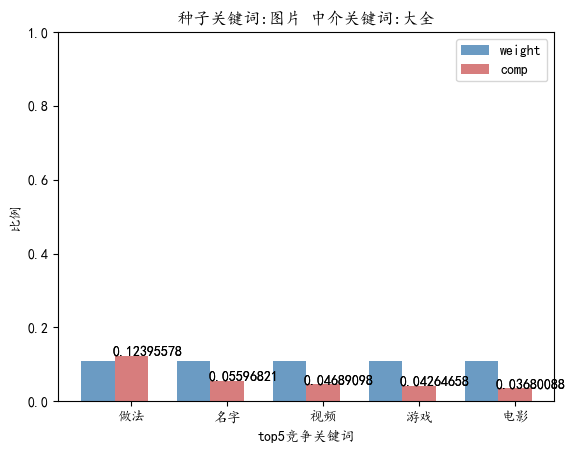

In [77]:
# 导入绘图模块
import matplotlib.pyplot as plt
import numpy as np


# 种子关键字选择
seedword = "图片"
# 中介关键词选择
agencyword = "大全"

filename = './result/seedword_'+seedword+'/agencyword_ '+agencyword+ '.txt'

comp_list = []
compkey_list = []
weight_list = []

# 获取weight
with open('./seedwords_agencywords/agency_words/seedword_'+seedword+'.txt', 'r', encoding='utf-8') as file:
        for record in file:
            info = record.split("||")
            if info[0][4:] == agencyword:
                print(float(info[2][8:]))
                weight_list.append(float(info[2][8:]))
                

# 获取comp
with open(filename, 'r', encoding='utf-8') as file:
        for record in file:
            info = record.split("||")
            print(info[3][5:])
            comp_list.append(float(info[3][5:]))
            compkey_list.append(info[2][6:])

# 构建数据
bar_width = 0.35

# 中文乱码的处理
plt.rcParams['font.sans-serif'] =["KaiTi"]
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.bar(np.arange(5), weight_list, label = 'weight', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(np.arange(5)+bar_width, comp_list, label = 'comp', color = 'indianred', alpha = 0.8, width = bar_width)
# 添加轴标签
plt.xlabel('top5竞争关键词')
plt.ylabel('比例')
# 添加标题
plt.title("种子关键词:" + seedword + " 中介关键词:" + agencyword )
# 添加刻度标签
plt.xticks(np.arange(5)+bar_width,compkey_list)
# 设置Y轴的刻度范围
plt.ylim([0, 1])

# 为每个条形图添加数值标签
for i,comp in enumerate(comp_list):
    plt.text(i+bar_width-0.2, comp, '%s' %comp)

for i,comp in enumerate(comp_list):
    plt.text(i+bar_width-0.2, comp, '%s' %comp)
# 显示图例
plt.legend()
# 显示图形
plt.show()
